# CIML Sequence Learning exercise

**Goal:**  Use simpleRNN, and/or GRU, to learn Keras api and options.  

**Problem:** Given a sequence of a real variable and binary indicator, 
              add real values when indicator=1

**Exercise Tasks:**
<br>
1
run notebook and look at graph (near end) with **model mse vs baseline (mean)** to see performance
<br>
2 change options that make up data:
<br>
$\;\;\;\;\;\;$ a. set the "t-fixed" boolean to False so that the time steps when indicator=1 will be random
<br>
$\;\;\;\;\;\;$ b. also, set num1=4 (number of ones=4, for example) 
<br>
$\;\;\;\;\;\;$ c. RERUN 
<br>
3 
a. find the code that defines the SimpleRNN model, copy it to the next cell, and change it to use GRU
<br>
b. find the code cell that compile/fits the model (ie look for comments with "<<<<----" in the text), change the model to use 'GRU', and rerun the notebook
<br>
Is there a difference between SRN or GRU vs baseline?
<br>
What if you increase number of hidden units or layers on one or both?
<br>
<br>
**Other things to try (with more time):**

*change the logic that makes the target:* 
<br>
 try summing the numbers that is two steps before when indicator=1 (look for nback variable below) 

*change input to use the random sine waves: (see seqlearning_timeseries notebook)*
<br>
 the target to be the input one step ahead but you have to change the model definition to use TimeDistributed option
 <br>



In [1]:
#IMPORT STATEMENTS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)  # for reproducibility
 
from tensorflow import keras
import tensorflow as tf


**Next cell has the sequence options to choose**

In [2]:
# =======================options to change =================
samplesize_2use=500;  #pick a large enough size
nsteps_2use    =20;    #this is T stpes

                       #<<<<<<<<<<<------------------
num1       =2          #choose number of 1s for binary variable
t_fixed    =True       #True or False,  are the times when it is 1 fixed or variable
t_fix_inds =[5,15]     #  the times to set it to 1

#Now set up parameters to run model   
numunits       =64
act2use        ='relu'  #or relu or sigmoid or tanh

print('options done')

options done


**Next cell generates binary indicator variable that is 1 according to options**

In [3]:
#Generate a binary variable that is 1 exactly num1 times in each sample
#  the time steps to set it to 1 are either fixed or randomly chosen for each sample
'''
nback      =2  #steps to look backward when adding
binary_num1=np.zeros((samplesize_2use,nsteps_2use,1))

if t_fixed:
    for i in range(len(t_fix_inds)):
       binary_num1[:,t_fix_inds[i]]=1
if not t_fixed:
    for i in range(samplesize_2use):             
      choices_fornum1 = np.random.choice(np.arange(nsteps_2use-nback), size=num1, replace=False, p=None) #pick out num1 indices                                      
      for j in choices_fornum1:
          binary_num1[i,j+nback]=1     

#plt.plot(binary_num1[1,:],'.')  #if you want to see the sample
print('binary variable generated')
'''

"\nnback      =2  #steps to look backward when adding\nbinary_num1=np.zeros((samplesize_2use,nsteps_2use,1))\n\nif t_fixed:\n    for i in range(len(t_fix_inds)):\n       binary_num1[:,t_fix_inds[i]]=1\nif not t_fixed:\n    for i in range(samplesize_2use):             \n      choices_fornum1 = np.random.choice(np.arange(nsteps_2use-nback), size=num1, replace=False, p=None) #pick out num1 indices                                      \n      for j in choices_fornum1:\n          binary_num1[i,j+nback]=1     \n\n#plt.plot(binary_num1[1,:],'.')  #if you want to see the sample\nprint('binary variable generated')\n"

In [4]:
#Sanity check: this will help check that each raw has right number of 1s
#print(max(np.sum(binary_num1,axis=1))  )
#print(min(np.sum(binary_num1,axis=1))  )


**Next cells generate random sequence of numbers, or sine waves with noise**

In [5]:
'''
#----- Generate sequence of random numbers  - 
def generate_random_series(batch_size, n_steps, noise_amp):
 series = noise_amp * (np.random.rand(batch_size, n_steps) ) # + noise that is uniform dist. between 0 to 1
 return series[..., np.newaxis].astype(np.float32)

noiseAmp_2use    =1;
my_randnum_seq   =generate_random_series(samplesize_2use,nsteps_2use,noiseAmp_2use)
print(my_randnum_seq.shape)
#plt.plot(my_randnum_seq[1,:,0])
#plt.title('a sample time series of random values unif dist')
'''

"\n#----- Generate sequence of random numbers  - \ndef generate_random_series(batch_size, n_steps, noise_amp):\n series = noise_amp * (np.random.rand(batch_size, n_steps) ) # + noise that is uniform dist. between 0 to 1\n return series[..., np.newaxis].astype(np.float32)\n\nnoiseAmp_2use    =1;\nmy_randnum_seq   =generate_random_series(samplesize_2use,nsteps_2use,noiseAmp_2use)\nprint(my_randnum_seq.shape)\n#plt.plot(my_randnum_seq[1,:,0])\n#plt.title('a sample time series of random values unif dist')\n"

**Next cell make the Y target values**

In [6]:
#now combine randnum seq,binary_num1 and make up Y values
'''
X_train=np.concatenate((my_randnum_seq,binary_num1),axis=2)
N,T,P   =X_train.shape

Y_train =np.zeros((N,))  #1 output at each step

for i in range(N):
    locs       = np.where(X_train[i,:,1]==1)        #column 1 of X_train has indicator    
    Y_train[i,]= np.sum(X_train[i,locs[0]-nback,0])     

ymean     =np.mean(Y_train[:,])
ymean_mse = np.mean(np.square(np.subtract(Y_train,ymean)))
plt.plot(Y_train[:,],'.')
plt.ylabel('true value')
plt.xlabel('data sample')
plt.title('Y train targets, mean'+str(round(ymean,5))+' mean mse:'+str(round(ymean_mse,5)))
'''

"\nX_train=np.concatenate((my_randnum_seq,binary_num1),axis=2)\nN,T,P   =X_train.shape\n\nY_train =np.zeros((N,))  #1 output at each step\n\nfor i in range(N):\n    locs       = np.where(X_train[i,:,1]==1)        #column 1 of X_train has indicator    \n    Y_train[i,]= np.sum(X_train[i,locs[0]-nback,0])     \n\nymean     =np.mean(Y_train[:,])\nymean_mse = np.mean(np.square(np.subtract(Y_train,ymean)))\nplt.plot(Y_train[:,],'.')\nplt.ylabel('true value')\nplt.xlabel('data sample')\nplt.title('Y train targets, mean'+str(round(ymean,5))+' mean mse:'+str(round(ymean_mse,5)))\n"

In [7]:
#to see one sample time series
#plt.plot(X_train[0,:,0])
#plt.plot(X_train[0,:,1])
#plt.legend(['X random','X indicator'])
#plt.title('sample data, Y target:'+str(np.round(Y_train[0],2)))

## SOLUTION NOTES, this next cell sets up Y target values based on noisy sine waves


(500, 20, 1)
Ymean: -0.002229928057311458  mse of ymean: 0.2303201677381223


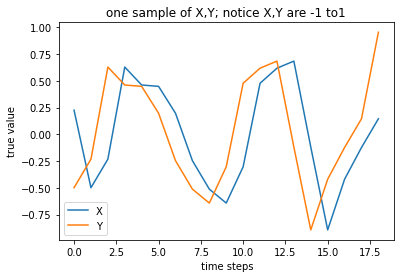

In [8]:
#Generate combination of sin wave with noise, random offsets, and frequencies
def generate_time_series(batch_size, n_steps, noise_amp):
 freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size,1 )
 
 time = np.linspace(0, 1, n_steps)
 series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
 series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
 series += noise_amp * (np.random.rand(batch_size, n_steps) - 0.5) # + noise that is uniform dist. around 0
 return series[..., np.newaxis].astype(np.float32)

#<<<<<------- To test out sine wave prediction, enable this block of code
if 1:
  #generate sine waves
  noiseAmp_2use  =1;
  my_noisywaves  =generate_time_series(samplesize_2use,nsteps_2use,noiseAmp_2use)
  print(my_noisywaves.shape)

  #now take sine wave data and make one step ahead prediction
  X_orig  =my_noisywaves
  N,T,P   =X_orig.shape   #Note that X train will have one extra time step

  X_train =np.zeros((N,T-1,P))
  Y_train =np.zeros((N,T-1,1))  #1 output at each step
  for i in range(N):
    X_train[i,:,0]= X_orig[i,0:T-1,0]     
    Y_train[i,:,0]= X_orig[i,1:T,0]     

  ymean     =np.mean(Y_train)
  ymean_mse = np.mean(np.square(np.subtract(Y_train,ymean)))
  print('Ymean:',ymean,' mse of ymean:',ymean_mse)

  #Sanity check, list out a sample, the Y should lead X by 1 step
  samp2ck=1
  plt.plot(X_train[samp2ck,:,0])
  plt.plot(Y_train[samp2ck,:,0])
  plt.ylabel('true value')
  plt.xlabel(' time steps')
  plt.legend(['X', 'Y'], loc='lower left')
  plt.title('one sample of X,Y; notice X,Y are -1 to1')



## The next cells set up the model, do training, plot results
## Review the results plot and note the performance relative to baseline mse

In [9]:
# Split data 
from sklearn.model_selection import train_test_split

X_train1, X_test1,Y_train1, Y_test1= train_test_split(X_train,Y_train, test_size=0.33) #use 33% for test data

print(X_train1.shape)
Y_train1.shape
print(Y_test1.shape)

(335, 19, 1)
(165, 19, 1)


In [10]:
#a Simple RNN setup  
#set return_sequences=True for all recurrent layers
#except the last one, if you only care about the last output
nvar           = P   #set number of variables to P 

mysrn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(numunits, return_sequences=True, input_shape=[None,nvar]),
    keras.layers.SimpleRNN(numunits),
    keras.layers.Dense(1,activation='linear')])     

#   <<<<<<<<<<<< ----------------------
# 1 change the 2nd layer above to 'return sequence' of activations  
#    keras.layers.SimpleRNN(numunits, return_sequences=True),

# 2 replace the Dense layer with TimeDistributed option as below,
#  to make predictions at each time step
#    keras.layers.TimeDistributed(keras.layers.Dense(1,activation='sigmoid'))]) 

mysrn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 64)          4224      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1)           65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


## Add in the GRU definition here:

In [11]:
# Set up a 2 layer GRU RNN; copy the code for that defines the SRN model and change
#  keras.layers.SimpleRNN   to   keras.layers.GRU

#mygru_model = keras.models.Sequential([  .........
 
        #<<<<<<<<<<<<<<---------------------- 

#mygru_model.summary()


In [12]:
#create a function to be 'called' back by keras during training
my_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse', 
    verbose=1,
    patience=10,   #num  epochs with no improvement after which training will be stopped.
    mode='min',
    restore_best_weights=True)


In [13]:
numepochs=100

my_model=mysrn_model   #<<<<<<<<<----- you can change the model here and run these cells again
#my_model=mygru_model   

my_model.compile(optimizer='adam',  # just use 'adam' to get defaults
                loss='mse',                  
                metrics='mse')                

fit_result = my_model.fit(X_train1,y=Y_train1,
                    validation_data=(X_test1,Y_test1),
                    epochs=numepochs,batch_size=32,verbose=1,callbacks=[my_early_stopping])


Epoch 1/100
11/11 [==============================] - 1s 33ms/step - loss: 0.3679 - mse: 0.3679 - val_loss: 0.2581 - val_mse: 0.2581
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2484 - mse: 0.2484 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2406 - mse: 0.2406 - val_loss: 0.2374 - val_mse: 0.2374
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2376 - mse: 0.2376 - val_loss: 0.2340 - val_mse: 0.2340
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.2344 - mse: 0.2344 - val_loss: 0.2308 - val_mse: 0.2308
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.2305 - mse: 0.2305 - val_loss: 0.2238 - val_mse: 0.2238
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 0.2192 - mse: 0.2192 - val_loss: 0.2108 - val_mse: 0.2108
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 0.2103

scores on validation data:
6/6 [==============================] - 0s 2ms/step - loss: 0.1924 - mse: 0.1924


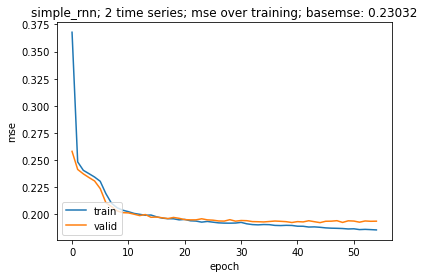

In [14]:
# Plot performance 
print('scores on validation data:')
mytest_eval=my_model.evaluate(X_test1,Y_test1)

metric2plot='mse'
# summarize history for accuracy
plt.figure()
plt.plot(fit_result.history[metric2plot])
plt.plot(fit_result.history['val_'+metric2plot])
plt.title(my_model.layers[0].name+'; '+str(num1)+' time series; '+metric2plot+' over training;'+ ' basemse: '+str(np.around(ymean_mse,5)))
plt.ylabel(metric2plot)
plt.xlabel('epoch')
#plt.ylim([0,1])
plt.legend(['train', 'valid'], loc='lower left')
plt.show()

In [15]:
# ----------------------

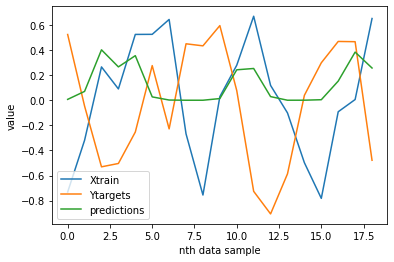

In [35]:
#Some code to get training and test set predictions
#(just for exploring performance)   unblock it if you want to try it
if 1:
  mytrain_pred=my_model.predict(X_train1[0:1,:,:])
  plt.plot(X_train1[0,:,0])
  plt.plot(Y_train[0,:,0])
  plt.plot(mytrain_pred[0])
  plt.ylabel('value')
  plt.xlabel('nth data sample')
  plt.legend(['Xtrain','Ytargets', 'predictions'], loc='lower left')



[[[0.6399498 ]
  [0.01411802]
  [0.0060668 ]
  [0.00528175]
  [0.00076082]
  [0.00130063]
  [0.03082424]
  [0.37260848]
  [0.35369825]
  [0.1367701 ]
  [0.03272435]
  [0.01131877]
  [0.00954929]
  [0.01626667]
  [0.26080433]
  [0.47696963]
  [0.4238853 ]
  [0.40336823]
  [0.00422308]]]


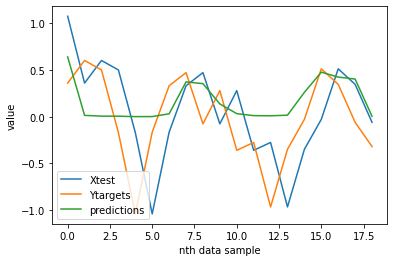

In [34]:
if 1:
  mytest_pred=my_model.predict(X_test1[0:1,:,:])
  plt.plot(X_test1[0,:,0])
  plt.plot(Y_test1[0,:,0])
  plt.plot(mytest_pred[0])
  plt.ylabel('value')
  plt.xlabel('nth data sample')
  plt.legend(['Xtest','Ytargets', 'predictions'], loc='lower left')


In [28]:
X_test1.shape

(165, 19, 1)